In [35]:
import requests
import pandas as pd

url = "https://data.cityofnewyork.us/resource/kvfd-bves.json"
params = {
    '$where': "issue_date <= '2023-12-31T23:59:59'"
}

limit = 1000000

url_with_limit = f"{url}?$limit={limit}"

response = requests.get(url_with_limit, params=params)
data = response.json()

df = pd.DataFrame(data)

In [30]:
df.head()

,summons_number,plate_id,registration_state,plate_type,issue_date,violation_code,vehicle_body_type,vehicle_make,issuing_agency,street_code1,...,unregistered_vehicle,vehicle_year,meter_number,feet_from_curb,intersecting_street,time_first_observed,violation_legal_code,violation_description,violation_post_code,cluster
0,1471497410,HZH8177,NY,PAS,1970,20,SUBN,NISSA,P,62200,...,0,2018,-,0,NaN,NaN,NaN,NaN,NaN,14
1,1471497630,JCX5781,NY,PAS,1970,20,P-U,DODGE,P,60790,...,0,2018,-,0,NaN,NaN,NaN,NaN,NaN,0
2,1471497641,HEK2391,NY,PAS,1970,20,SUBN,KIA,P,60790,...,0,2020,-,0,NaN,NaN,NaN,NaN,NaN,0
3,1471497653,GWY9859,NY,PAS,1970,20,SUBN,JEEP,P,60790,...,0,2009,-,0,NaN,NaN,NaN,NaN,NaN,0
4,1471497665,HEZ5501,NY,PAS,1970,20,SUBN,SUBAR,P,60790,...,0,2015,-,0,NaN,NaN,NaN,NaN,NaN,0


In [31]:
print(df.columns.tolist())

['summons_number', 'plate_id', 'registration_state', 'plate_type', 'issue_date', 'violation_code', 'vehicle_body_type', 'vehicle_make', 'issuing_agency', 'street_code1', 'street_code2', 'street_code3', 'vehicle_expiration_date', 'violation_location', 'violation_precinct', 'issuer_precinct', 'issuer_code', 'issuer_command', 'issuer_squad', 'violation_time', 'violation_county', 'violation_in_front_of_or', 'house_number', 'street_name', 'date_first_observed', 'law_section', 'sub_division', 'days_parking_in_effect', 'from_hours_in_effect', 'to_hours_in_effect', 'vehicle_color', 'unregistered_vehicle', 'vehicle_year', 'meter_number', 'feet_from_curb', 'intersecting_street', 'time_first_observed', 'violation_legal_code', 'violation_description', 'violation_post_code', 'cluster']


In [16]:
df['violation_location']

0         100
1         100
2         100
3         100
4         100
         ... 
999995    NaN
999996    NaN
999997    NaN
999998    NaN
999999    NaN
Name: violation_location, Length: 1000000, dtype: object

/Users/congxiaowang/opt/anaconda3/envs/si649/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/congxiaowang/opt/anaconda3/envs/si649/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/congxiaowang/opt/anaconda3/envs/si649/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/congxiaowang/opt/anaconda3/envs/si649/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed 

Cluster 0:
violation_code
36    33413
21     1875
20     1773
5      1717
14     1588
Name: count, dtype: int64
Cluster 1:
violation_code
36    37760
5      1709
7      1254
12     1089
14     1010
Name: count, dtype: int64
Cluster 2:
violation_code
21    4486
38    3833
20    2941
14    2869
40    2361
Name: count, dtype: int64
Cluster 3:
violation_code
36    35323
20     3270
14     2336
21     2189
38     2136
Name: count, dtype: int64
Cluster 4:
violation_code
36    37997
5      3856
21     3308
14     3195
20     2915
Name: count, dtype: int64


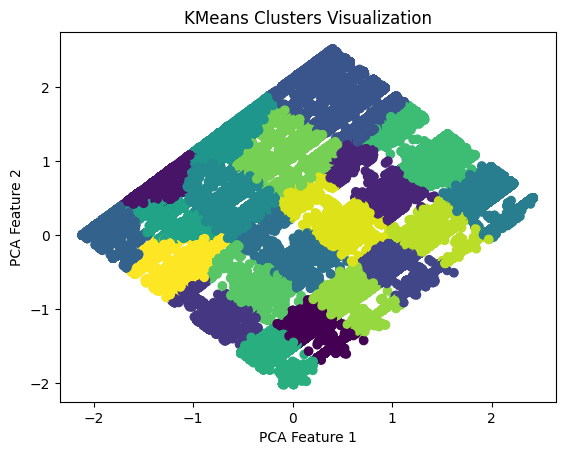

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


le = LabelEncoder()
df['vehicle_color'] = le.fit_transform(df['vehicle_color'])
df['street_name'] = le.fit_transform(df['street_name'])
df['issue_date'] = pd.to_datetime(df['issue_date']).dt.year

features = df[['vehicle_color', 'street_name', 'issue_date']]


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# KMeans 聚类
kmeans = KMeans(n_clusters=20) 
clusters = kmeans.fit_predict(features_scaled)

df['cluster'] = clusters

for i in range(5):
    cluster = df[df['cluster'] == i]
    print(f"Cluster {i}:")
    print(cluster['violation_code'].value_counts().head())

# 可视化（使用 PCA 降维）
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_scaled)

plt.scatter(reduced_features[:,0], reduced_features[:,1], c=df['cluster'])
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('KMeans Clusters Visualization')
plt.show()


In [20]:
print(df['unregistered_vehicle'].value_counts())

unregistered_vehicle
0    31071
Name: count, dtype: int64


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


In [34]:
df['intersecting_street']

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
999995          TH ST
999996             ST
999997            AVE
999998    LBOURNE AVE
999999       254TH ST
Name: intersecting_street, Length: 1000000, dtype: object

In [41]:
df['street_name']

0             SHORE FRONT PKWY
1          ROCKAWAY BEACH BLVD
2          ROCKAWAY BEACH BLVD
3          ROCKAWAY BEACH BLVD
4          ROCKAWAY BEACH BLVD
                  ...         
999995    EB NEPTUNE AVE @ W 5
999996    EB UNION TPKE @ KENT
999997     SB BELL BLVD @ 18TH
999998    NB KISSENA BLVD @ ME
999999    NB RIVERDALE AVE @ W
Name: street_name, Length: 1000000, dtype: object

In [49]:
len(df['street_name'].unique())

12759

In [44]:
srnull = df['street_name'].isna().sum()
internull = df['intersecting_street'].isna().sum()
print(srnull,internull)

111 404751


In [53]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# [‘Broadway’, ‘7th’]
# [‘Central Park West’, ‘81’]
# [‘59th Street’]
# [‘42’,’5th’]
# [‘Amsterdam’, ‘West 79’]
# [‘Houston’]
# [‘Madison Avenue’, ‘42’]
# [‘Times’]
# [‘8’,’34’]
# [‘9th’, ‘W 57th’]
# [‘Wall’, ‘Water Street’]
# [‘Fulton Nassau’]
# [‘Avenue’, ‘West’]
# [‘York’, ‘East 76th Street’]
# [‘E 14’, ‘Union’]
# [‘St’, ‘West 145th Street’]
# [‘Jr Blvd’, ‘W’]
# [‘Roosevelt Avenue’, ‘Queens’]
# [‘Bed Avenue’,  ‘N 7th Brooklyn’]
# [‘E Boulevard]

queries = ['BROAD', '118']
df1 = df
df1['intersecting_street'].fillna('', inplace=True)
df1['street_name'].fillna('', inplace=True)
df1['document'] = df1['street_name'] + ' ' + df1['intersecting_street']

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df1['document'])
top_indices_per_query = {}
for query in queries:
    query_vec = vectorizer.transform([query])
    cos_similarities = cosine_similarity(query_vec, tfidf_matrix)
    sorted_doc_indices = cos_similarities.argsort()[0][::-1]
    print(f"Query: {query}")
    # for index in sorted_doc_indices[:10]:
    #     print(df.iloc[index]['document'], cos_similarities[0][index])
    seen_documents = set()
    for index in sorted_doc_indices[:50]:
        doc = df.iloc[index]['document']
        if doc not in seen_documents:
            seen_documents.add(doc)
            print(doc, cos_similarities[0][index])
    top_indices_per_query[query] = sorted_doc_indices[:2]


Query: BROAD
Broad St  0.98121700814564
Query: 118
118 ST  0.9877220950778505
E 118 ST  0.9877220950778505
B 118 ST  0.9877220950778505
118 STREET  0.9091836703079508
B 118 STREET  0.9091836703079508
WEST 118 ST  0.8974757351482924
BEACH 118 ST  0.8769996190934833
NB 1 Avenue @ E 118 St 0.8651393825254176
SB 2 Avenue @ E 118 St 0.8632429348516264
EAST 118 ST  0.8431951115029116
BEACH 118 STREET  0.8206346200178317
EAST 118 STREET  0.7927398291688011
Cambreleng Ave  0.0
Prospect Ave  0.0


In [54]:
for query, indices in top_indices_per_query.items():
    print(f"Query: {query}")
    for index in indices:
        print(df.iloc[index])
        print()

Query: BROAD
summons_number                           8590789690
plate_id                                    GWF8771
registration_state                               NY
plate_type                                      PAS
issue_date                  2020-07-17T00:00:00.000
violation_code                                   26
vehicle_body_type                              SUBN
vehicle_make                                   JEEP
issuing_agency                                    T
street_code1                                  13590
street_code2                                  30650
street_code3                                  31610
vehicle_expiration_date                    20210302
violation_location                                1
violation_precinct                                1
issuer_precinct                                   1
issuer_code                                  363127
issuer_command                                 T105
issuer_squad                                      M

In [55]:
for query, indices in top_indices_per_query.items():
    print(f"Query: {query}")
    matched_rows = df.iloc[indices]
    print(f"Number of matched rows: {len(matched_rows)}")
    print(matched_rows)
    print() 

Query: BROAD
Number of matched rows: 2
       summons_number plate_id registration_state plate_type  \
255296     8590789690  GWF8771                 NY        PAS   
712068     8627648920  76021MN                 NY        COM   

                     issue_date violation_code vehicle_body_type vehicle_make  \
255296  2020-07-17T00:00:00.000             26              SUBN         JEEP   
712068  2020-07-23T00:00:00.000             14               VAN        DODGE   

       issuing_agency street_code1  ... unregistered_vehicle vehicle_year  \
255296              T        13590  ...                  NaN         2018   
712068              T        13590  ...                  NaN         2019   

       meter_number feet_from_curb intersecting_street time_first_observed  \
255296          NaN              0                                     NaN   
712068          NaN              0                                     NaN   

       violation_legal_code violation_description violati

In [56]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


queries = ['BROAD', '118']
df1 = df
df1['intersecting_street'].fillna('', inplace=True)
df1['street_name'].fillna('', inplace=True)
df1['document'] = df1['street_name'] + ' ' + df1['intersecting_street']

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df1['document'])
relevant_rows = []
for query in queries:
    query_vec = vectorizer.transform([query])
    cos_similarities = cosine_similarity(query_vec, tfidf_matrix)
    sorted_doc_indices = cos_similarities.argsort()[0][::-1]
    print(f"Query: {query}")
    # for index in sorted_doc_indices[:10]:
    #     print(df.iloc[index]['document'], cos_similarities[0][index])
    seen_documents = set()
    for index in sorted_doc_indices[:50]:
        doc = df.iloc[index]['document']
        if doc not in seen_documents:
            seen_documents.add(doc)
            print(doc, cos_similarities[0][index])
    top_indices = sorted_doc_indices[:2]
    relevant_rows.extend(df.iloc[top_indices].values.tolist())

relevant_df = pd.DataFrame(relevant_rows, columns=df.columns)

Query: BROAD
Broad St  0.98121700814564
Query: 118
118 ST  0.9877220950778505
E 118 ST  0.9877220950778505
B 118 ST  0.9877220950778505
118 STREET  0.9091836703079508
B 118 STREET  0.9091836703079508
WEST 118 ST  0.8974757351482924
BEACH 118 ST  0.8769996190934833
NB 1 Avenue @ E 118 St 0.8651393825254176
SB 2 Avenue @ E 118 St 0.8632429348516264
EAST 118 ST  0.8431951115029116
BEACH 118 STREET  0.8206346200178317
EAST 118 STREET  0.7927398291688011
Cambreleng Ave  0.0
Prospect Ave  0.0


In [57]:
# violation_counts = relevant_df['violation_code'].value_counts().reset_index()
# violation_counts.columns = ['violation_code', 'count']

violation_counts['violation_code'] = violation_counts['violation_code'].astype(int)
fines_df['violation_code'] = fines_df['violation_code'].astype(int)
fines_df = pd.read_csv('ViolationCodes.csv')
final_table = pd.merge(violation_counts, fines_df, on='violation_code')


In [59]:
fines_df = pd.read_csv('ViolationCodes.csv')
final_table = pd.merge(violation_counts, fines_df, on='violation_code')

ValueError: You are trying to merge on object and int64 columns for key 'violation_code'. If you wish to proceed you should use pd.concat